### 붓꽃 데이터 품종 예측하기 예제

In [27]:
# 사이킷런 버전 확인
import sklearn
print(sklearn.__version__)

0.22.1


In [28]:
# 사이킷런 필요 모듈 로딩
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [29]:
import numpy as np
import pandas as pd
# 판다스로 출력해보면 굉장히 세련되고 보기 좋게 나온다

In [34]:
# 붓꽃 데이터 세트를 로딩
iris_dataset = load_iris()

지금부터 iris_dataset을 탐색해보고자 한다

In [31]:
type(iris_dataset)

sklearn.utils.Bunch

* Bunch 클래스는 파이썬 딕셔너리 자료형과 유사
    - key와 values로 구성되어 있다
    - 이런 Bunch타입으로 불러와진다
* 데이터의 key 값을 확인해보기

In [32]:
#iris_dataset의 키
iris_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

키는 보통 data, target, target_name, feature_names, DESCR로 구성
* **data**는 특성 값 : 꽃잎(petal)의 길이와 폭, 꽃받침(sepal)의 길이와 폭을 수치 값으로 가지고 있는 NumPy 배열
* **target**은 붓꽃의 품종
    - 0, 1, 2 ... 숫자형태로 되어있다
    - 그래서 아래에 target_names로 매겨준다
* **target_names**는 타깃의 이름
* **feature_names**는 특성의 이름
* **DESCR**은 데이터 세트에 대한 설명과 각 특성의 설명

In [35]:
#데이터세트에 대한 설명
print(iris_dataset['DESCR'])
#꼭 print()해줘야 description나온다

# class는 우리가 분류할 데이터를 말해준다
# 서머리에서는 통계적 내용들을 나타내준다

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
#타깃의 이름
iris_dataset['target_names']
# 이런건 print()사용 안해도 잘 나온다

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
#특성의 이름
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
#data의 타입
type(iris_dataset['data'])

numpy.ndarray

In [36]:
#data의 크기
iris_dataset['data'].shape
# 150개의 샘플과 특성이 4개 존재한다

(150, 4)

In [37]:
#data의 처음 다섯 행
iris_dataset['data'][:5]
# 5개의 행만 한번 출력해서 보겠다
# 실제 관측한 데이터이다

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [13]:
#target의 타입
type(iris_dataset['target'])

numpy.ndarray

In [14]:
#target의 크기
iris_dataset['target'].shape
# 1차원이면 된다

(150,)

In [15]:
#타깃
iris_dataset['target']
# 150개가 나온다
# 정답이 쭉 나온 것이다

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [38]:
#DataFrame 형태로 확인
# 보기 좋게
# 있는 그대로 칼럼 네임을 넣어주면 된다
# label을 하나 추가했는데 정답 데이터(꽃 종류 인덱스)까지 같이 보여주는 것이다
iris_df = pd.DataFrame(data=iris_dataset['data'], columns=iris_dataset['feature_names'])
iris_df['label'] = iris_dataset['target']
iris_df.head(3)
# 3개의 행만 출력

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


### 학습 데이터 , 테스트 데이터

In [56]:
#학습 데이터와 테스트 데이터 세트로 분리
# 실제 데이터와 관측데이터와 정답데이터를 넣어줌
# random_state는 랜덤하게 돌려서 얻는 기준을 말함.
# 어떻게 섞이느냐에 따라 성능이 달라지기도 한다
# 같은 결과를 공유하기 위해 우리 모두 random_state = 0 사용했다

X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], 
                                            iris_dataset['target'], random_state=0)

# 데이터가 많을 수록 학습에 유리하긴 하다. 
# default는 75:25이다. 
# 테스트는 성능을 알기 위한 것이다.

In [58]:
X_train.shape

(112, 4)

In [60]:
y_train.shape

(112,)

In [61]:
X_test.shape

(38, 4)

In [62]:
y_test.shape

(38,)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026354E66A88>,
      dtype=object)

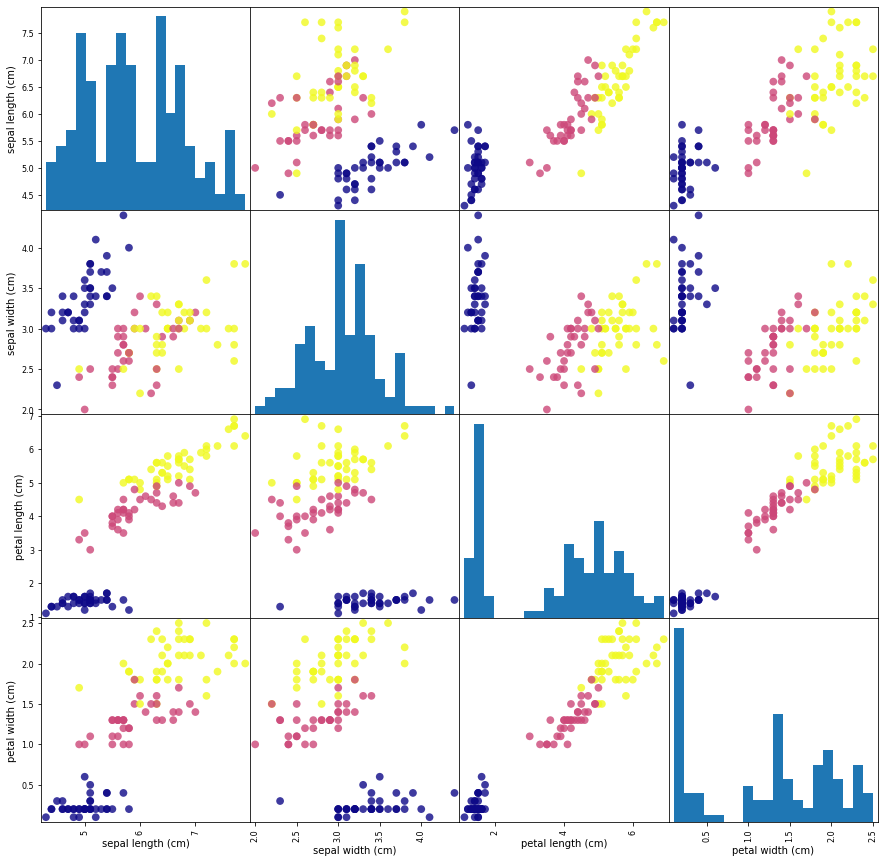

In [40]:
#scatter matrix로 특성간의 분포 확인 (파란색 : setosa, 붉은색 : versicolor, 노란색 : virginica)
iris_dataframe = pd.DataFrame(X_train, columns = iris_dataset.feature_names)
pd.plotting.scatter_matrix(iris_dataframe, c= y_train, figsize=(15,15), marker='o',
                          hist_kwds={'bins': 20}, s=60, alpha=0.8, cmap='plasma')
# cmap = color map을 뜻하고 plasma는 색 조합 중 하나이다.


https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
In combination with colormap this will, in your case when c = y_train (the label or ground truth of your data), color your datapoints according to there class (which type of iris flower for the iris data set).

In [70]:
#모델 선택, 학습 : k-최근접 이웃 알고리즘
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
# 최근접 이웃을 1개로 보고 모델 학습을 시킴
# 거리를 기반으로 판단
# 가깝고 먼 것을 기준으로 모델이 이웃을 선택한다.

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [42]:
#꽃받침 5*2.9 꽃잎 1*0.2 의 붓꽃 예측해보기
X_new = np.array([[5, 2.9, 1, 0.2]])
prediction = knn.predict(X_new)
# 어떻게 예측을 해낼지 
print(prediction)
print(iris_dataset['target_names'][prediction])

[0]
['setosa']


In [65]:
#테스트 세트로 예측
y_pred = knn.predict(X_test)

In [66]:
y_test
# 정답 데이터이다

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])

In [67]:
y_pred
# 이렇게 예측 결과가 나온다

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [71]:
y_pred == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False])

In [69]:
##성능 평가 (정확도) - option 1
np.mean(y_pred == y_test)
# 97% 

0.9736842105263158

In [45]:
#성능 평가 (정확도) - option 2
knn.score(X_test, y_test)

0.9736842105263158

In [46]:
#성능 평가 (정확도) - option 3
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9736842105263158

### 데이터 적재 

In [47]:
# 사이킷런 필요 모듈 로딩
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [48]:
import numpy as np
import pandas as pd

In [49]:
# 붓꽃 데이터 세트를 로딩
iris_dataset = load_iris()

###  데이터 세트 분리, 모델 학습

In [50]:
# 학습 데이터와 테스트 데이터의 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

In [51]:
#모델 선택, 학습 : k-최근접 이웃 알고리즘
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

### 예측 수행, 평가 

In [52]:
# 꽃받침 5*2.9 꽃잎 1*0.2 의 붓꽃 예측해보기
X_new = np.array([[5, 2.9, 1, 0.2]])
prediction = knn.predict(X_new)
print(prediction)
print(iris_dataset['target_names'][prediction])

[0]
['setosa']


In [53]:
# 테스트 세트로 예측
y_pred = knn.predict(X_test)

In [54]:
# 성능 평가(정확도)
knn.score(X_test, y_test)

0.9736842105263158

In [55]:
# iris_dataset의 키
iris_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

20200817 머신러닝 개요 - 스스로 답해보기 (1)

1. 머신러닝 정의
	- 머신러닝은 명시적인 프로그래밍 없이 컴퓨터가 학습하는 능력을 갖추게 하는 연구 분야다. (아서 사무엘, 1959)
	-  어떤 작업 T에 대한 컴퓨터 프로그램의 성능을 P로 측정했을때 경험E로 인해 성능이 향상됐다면, 이 컴퓨터 프로그램은 작업 T와 성능 측정 P에 대해 경험 E로 학습한 것이다 (톰 미첼, 1997)
	-  머신러닝은 데이터로부터 학습하도록 컴퓨터를 프로그래밍하는 과학(또는 예술)

2. 머신러닝에 유용한 분야 4가지
	- 기존 솔루션으로는 많은 수동 조정과 규칙이 필요한 문제
	- 전통적인 방법으로는 전혀 해결 방법이 없는 복잡한 문제( 음성인식, 얼굴 인식)
	-  변화하는 환경에 적응해야 하는 문제
	- 복잡한 문제와 대량의 데이터에서 통찰 얻기(데이터마이닝)
3. 레이블된 훈련 세트란? 
	- 지도학습에서 훈련 데이터에 포함되는 정답 
4. 가장 많이 사용되는 지도 학습 작업 2가지
	- 분류(classification) : 이진 분류 / 다중 분류
	- 회귀(regression)
5. 많이 사용되는 비지도 학습 4가지
	- 군집
	- 시각화
	- 차원축소
	- 연관 규칙 학습
6. 고객을 여러 그룹으로 분할한다면 어떤 알고리즘 사용?
	- 군집 알고리즘 사용
7. 스팸 감지의 문제는 지도학습? 비지도 학습?
	- 지도학습
8. 온라인 학습 시스템이란?
	- 아주 큰 데이터 셋을 학습하는 시스템에도 온라인 학습 알고리즘 사용 가능
	- 이를 외부 메모리 학습이라고 함
	- 알고리즘이 데이터 일부를 읽어 들이고 훈련 단계를 수행, 전체 데이터가 모두 적용될 때까지 이 과정을 반복
	- 점진적 학습이라고도 함. 

머신러닝 개요 - 스스로 답해보기 (2)

1. 예측을 하기 위해 유사도 측정을 사용하는 알고리즘은?
	- 사례 기반(instance-based) 학습
		-  일반화 방법에 따라 사례 기반과 모델 기반 학습으로 나눔.
		- 시스템이 사례를 기억함으로써 학습
		- 유사도 측정을 사용해 새로운 데이터에 일반화
		- k-최근접 이웃(k-Nearest Neighbors)
2. 모델 파라미터와 하이퍼파라미터의 차이?
	- 모델 파라미터
		-  모델은 하나 이상의 파라미터를 사용해 새로운 샘플이 주어지면 무엇을 예측할지 결정
		- 학습 알고리즘은 모델이 새로운 샘플에 잘 일반화 되도록 이런 파라미터들의 최적값을 찾음
	- 하이퍼파라미터
		- 하이퍼파라미터는 모델이 아니라 학습 알고리즘 자체의 파라미터
		- 학습 알고리즘으로부터 영향을 받지 않으며
		- 훈련 전에 미리 지정되고
		- 훈련하는 동안 상수로 남아있음
		
3. 모델 기반 알고리즘이 훈련 후에 찾아내는 것은?
	- 주어진 데이터에서 비용함수의 값이 가장 작아지는 모델 파라미터를 찾고자 한다.  즉 최적의 파라미터를 도출하고자 한다. 
4. 머신러닝 도전과제1 (나쁜 데이터의 예)
	- 충분하지 않은 양의 훈련 데이터
	- 대표성 없는 훈련 데이터
	- 낮은 품질의 데이터
	- 관련 없는 특성
5. 머신러닝 도전과제2 (나쁜 알고리즘의 예)
	- 훈련 데이터 과대 적합
	- 훈련 데이터 과소 적합
6. 테스트 세트란?
	- 테스트 세트란 훈련 세트로 학습된 모델을 평가함으로써 새로운 샘플에 모델이 얼마나 잘 작동할지 예측할 수 있게 한다. 
	- 테스트 세트에서만 최적화된 모델이 만들어져 새로운 데이터에서 잘 동작하지 않을 수 있다. 
7. 검증 세트란?

8. 테스트 세트를 사용해 하이퍼파라미터 튜닝시 문제점은?


## 1. 머신러닝을 어떻게 정의할 수 있나요?
    - 책에서 소개하는 머신러닝에 대한 일반적인 두 가지 정의는 다음과 같습니다.

ㅤ

[머신러닝]은 명시적인 프로그래밍 없이 컴퓨터가 학습하는 능력을 갖추게 하는 연구분야다. (Arthur Samuel, 1959)

ㅤ

어떤 작업 T에 대한 컴퓨터 프로그램의 성능을 P로 측정했을 때 경험 E로 인해 성능이 향상됐다면, 이 컴퓨터 프로그램은 작업 T와 성능 측정 P에 대해 경험 E로 학습한 것이다. (Tom Mitchell, 1997)

ㅤ
이 중 한 번에 직관적으로 다가오지 않는 두 번째 정의를 풀어서 설명하자면 다음과 같습니다.
ㅤ
1) 프로그램이 작업 T를 수행하는 능력을 성능 P라고 한다.
2) 어떤 경험 E로 인해서 프로그램의 성능 P가 향상되었다.
3) 이 때, 프로그램은 작업 T를 경험 E로 학습하였다고 할 수 있다.
ㅤ

이 때 경험 E는 인간이 직접적으로 코딩을 하거나 명시적인 프로그래밍을 입력받는 것이 아닌, '데이터'입니다.
즉, 머신러닝은 데이터로부터 성능이 향상되는(학습하는) 시스템을 만드는 것이라고 할 수 있습니다.

ㅤ

## 2. 머신러닝이 도움을 줄 수 있는 문제 유형 네 가지는 무엇인가요?
    - 책에서 구분한 문제 유형 네 가지는 다음과 같습니다.

기존의 솔루션으로는 많은 수동 조정과 규칙이 필요한 문제 : 머신러닝 모델이 간단하고 더 빠르게 수행되도록 할 수 있습니다.
전통적인 방식으로는 전혀 해결 방법이 없는 복잡한 문제 : 머신러닝 기법으로 해결 방법을 찾을 수 있습니다.
유동적인 환경에 속해있는 문제 : 머신러닝 시스템은 새로운 데이터에도 실시간으로 적응할 수 있습니다.
복잡한 문제와 대량의 데이터로부터 통찰 얻기 : 문제를 해결하는 것뿐만 아니라 머신러닝 학습 과정으로부터 통찰(insight)을 얻을 수도 있습니다.
즉, 머신러닝을 이용하면 전통적인 방법으로는 해결이 어려웠던 복잡한 문제들을 해결할 실마리를 찾을 수 있을뿐만 아니라, 대량의 연산을 처리하는 머신러닝 학습 과정으로부터 생각지 못했던 정보나 통찰을 얻을 수도 있습니다.

ㅤ

## 3. 레이블된 훈련 세트란 무엇인가요?
    - 레이블 된 훈련 세트란, 특징 정보(feature)를 담는 training data에 사용자가 원하는 정답 정보(label)가 함께 담겨있는 데이터셋을 말합니다.
예를 들어,

꽃 종류 분류 문제의 경우

특징(feature) : 꽃의 크기, 잎의 크기 등
정답(label) : 꽃의 종류 (카테고리 데이터)
자전거 대여량을 예측하는 회귀 문제의 경우

특징(feature)정보 : 요일, 날씨, 기온 등
정답(label) : 자전거 대여량 (실수형 데이터)
와 같은 데이터셋이 레이블 된 훈련세트 (labeled train dataset) 입니다.

ㅤ

## 4. 가장 널리 사용되는 지도 학습 작업 두 가지는 무엇인가요?
    - 지도학습은 훈련 또는 학습 (train) 과정 중에 맞춰야 하는 정답 정보가 함께 제공되는 학습을 말합니다.
    - 가장 널리 사용되고 또한 가장 보편적인 지도학습 작업의 두 가지는 분류 Classification와 회귀 Regression 입니다.

분류는 데이터가 어떤 카테고리에 속하는지, 카테고리를 예측하는 문제입니다. 따라서 정답이 될 값이 이산(descrete)값이며 유한한 값입니다. 분류 문제의 가장 대표적인 예는 꽃의 종류 예측하기, 타이타닉호에 탑승한 승객의 생존 여부 예측하기 등이 있습니다. 꽃 문제의 경우 정답 카테고리는 [장미, 튤립, 국화] 등이 될 수 있으며 타이타닉 문제의 경우 정답 카테고리는 [1(생존), 0(사망)]이 될 수 있습니다.
반면, 회귀는 데이터의 특정 값 자체를 예측하는 문제입니다. 따라서 정답이 될 값은 연속(continuous)한 값이며 무한한 범위에서 존재하는 값입니다. 회귀 문제의 대표적인 예는 자전거 대여량 예측하기, 집값 예측하기 등이 있습니다. 이 경우 두 문제 다 정답은 [x : x는 양수인 실수]라는 광범위하면서 연속적인 값을 가질 수 있습니다.
ㅤ

## 5. 보편적인 비지도 학습 작업 네 가지는 무엇인가요?
    - 비지도학습은 지도학습과 달리 정답 정보가 제공되지 않는 상태에서 학습이 이루어집니다.
보편적인 비지도 학습 네 가지는 군집 Clusturing, 시각화 Visualization, 차원축소 Demensionality Reduction, 그리고 연관규칙학습 Association Rule Learning입니다.

군집은 주어진 데이터를 특정 개수의 그룹 (군집, cluster) 으로 나누는 작업입니다. 각 데이터 원소가 원래 어떤 그룹인지는 주어지지 않은 상태에서(즉, 정답이 없는 상태에서) 각 데이터들이 모여있는 정도, 각 데이터간의 거리 등의 정보를 활용해서 그룹화하는 알고리즘입니다. k-평균(k-means), DBSCAN, 계층군집분석(HCA) 등의 알고리즘이 있습니다.
시각화는 차원축소와 같은 맥락에서 볼 수 있습니다. 머신러닝에서 활용되는 데이터는 일반적으로 굉장히 높은 차원으로 이루어져 있습니다. 우리는 3차원 이상에 존재하는 데이터는 눈으로 볼 수 없기때문에 시각화를 하려면 데이터를 높은 차원에서 낮은 차원으로 차원 축소를 해야합니다. 2차원 또는 3차원으로 축소를 시키면 우리는 데이터를 좌표평면 또는 좌표공간에 시각화해서 볼 수 있습니다.
차원축소 또한 정답정보(label)가 없는 상태에서 데이터를 N차원에서 낮은 차원으로 축소시키는 비지도 학습 알고리즘입니다. 차원축소는 시각화 외에도, 불필요하게 데이터의 크기가 너무 클 때 효과적인 차원축소를 통한다면 정보는 많이 잃지 않으면서 데이터 크기를 줄여서 연산량을 줄일 수 있습니다. 차원축소는 N차원에 존재하는 데이터, 즉 "특성(feature)이 N가지" 존재하는 데이터에서 상관관계가 높은 특성을 하나로 합쳐 특성 개수를 줄이는 방법이 있고, 이를 특성추출(Feature Extraction)이라고 합니다. 구체적인 차원축소 알고리즘으로는 주성분 분석(PCA), t-SNE 등이 있습니다.
연관규칙학습은 각 데이터끼리의 연관성을 분석해서 규칙을 찾아 데이터와 데이터 간의 관계를 수치적으로 예측하는 알고리즘입니다. 이 알고리즘은 자연어 처리에서 많이 쓰입니다. 예를 들어 문장 생성 또는 문장 요약 등의 작업에서, 단어간의 연관성을 사전에 학습한 후 문장을 만들어 낼 때 "나는 오늘 공부를" 까지의 문장이 있다면 그 뒤의 데이터로 올 수 있는 것을 연관성이 높은 데이터 순으로 출력할 수 있습니다. 효과적으로 학습이 되었다면 "한다", "했다", "할 것이다" 등의 문장을 만들어 낼 수 있을 것입니다.
ㅤ

## 6. 사전 정보가 없는 여러 지형에서 로봇을 걸어가게 하려면 어떤 종류의 머신러닝 알고리즘을 사용할 수 있나요?
    - 사전 정보가 전혀 없는, 즉 데이터가 전혀 주어지지 않는 제로베이스 상태에서 학습을 시작해서 스스로 최적의 알고리즘을 찾아내는 학습을 강화학습이라고 합니다. 로봇을 걷게 만드는 작업은 강화학습을 이용해서 이루어질 수 있습니다. 강화학습은 위의 지도학습, 비지도학습 등의 알고리즘과 매우 다른 알고리즘입니다. 유명세를 탔던 알파고도 강화학습 알고리즘을 통해 학습되었습니다.
강화학습을 일반적으로 설명할 때 에이전트 Agent, 환경 Environment, 행동 Action, 보상 Reward, 정책 Policy 등의 단어를 이용합니다. 이를 로봇이 걸어가는 상황에 대입해서 간단히 정리하면 다음과 같습니다.

에이전트 : 로봇
학습하는 시스템 그 자체를 말합니다.
환경 : 여러 지형
로봇이 학습해 나가야 하는 주변 환경을 말합니다. 초기에 로봇은 환경에 대한 정보가 아무것도 없고, 점차 알아나가야 합니다.
행동 : 로봇이 취하는 여러 행동
처음에 아무 사전 학습이 되어있지 않을 때는 랜덤으로 매 순간의 행동을 선택할 수 있습니다. 예를 들어 왼쪽 발을 10cm 앞으로 옮기기, 오른쪽 발을 10cm 오른쪽에 딛기 등이 있을 수 있고, 점차 환경을 학습해 나가면서 최적화된 행동들을 선택할 수 있게 됩니다.
보상 : 로봇이 한 행동에 대해서 받는 피드백
안전한 지형에 발을 딛었을 경우 보상으로 양(+)의 점수를 주고, 위험한 지형에 발을 딛었을 경우 음(-)의 보상 또는 패널티를 받도록 알고리즘을 짤 수 있습니다. 로봇은 보상에 따라 더 좋은 보상을 받는 행동들이 뭔지 알 수 있고, 그 정보들을 종합하면서 전략을 짤 수 있게 됩니다.
정책 : 로봇이 학습하는 전략
로봇은 계속해서 행동선택 → 보상받기 → 보상에 따라 행동 수정의 과정을 거치면서 보상이 최대화되는 행동의 일련 과정 (sequence)을 학습하게 될 것입니다. 이렇게 학습된 최상의 전략, 또는 알고리즘을 정책이라고 합니다.
ㅤ

## 7. 고객을 여러 그룹으로 분할하려면 어떤 알고리즘을 사용해야 하나요?
고객을 그룹을 분할할 때에는 두 가지 케이스가 있을 수 있습니다.

고객이 나뉘어질 그룹이 사전에 정의되어 있다면 지도학습의 분류 문제로 풀 수 있습니다. 이 경우 학습데이터는 고객의 여러 특징 정보와 함께 그 고객이 어떤 그룹인지 label을 담고 있어야 합니다.
고객이 나뉘어질 그룹을 사전에 알고있지 못하다면 비지도학습의 군집 문제로 풀 수 있습니다. 이 경우에는 학습데이터로 고객의 특징 정보만 담긴 데이터를 입력하면 군집 알고리즘을 이용해서 군집화할 수 있을 것입니다.
ㅤ

8. 스팸 감지의 문제는 지도 학습과 비지도 학습 중 어떤 문제로 볼 수 있나요?
특정 이메일이 스팸 메일인지 아닌지를 판별하는 문제는 "스팸인지 아닌지" 라는 label이 주어지므로 지도학습의 분류 문제입니다.

ㅤ

9. 배치학습 시스템과 온라인 학습 시스템이 무엇인가요?
머신러닝의 학습 시스템은 입력데이터를 실시간으로 (또는 점진적으로) 학습할 수 있는지의 여부에 따라 배치학습과 온라인학습으로 구분할 수 있습니다.

배치학습은 주어진 학습데이터를 모두 사용해서 학습합니다. 그러므로 시간과 자원이 많이 소모되고, 새로운 데이터가 들어오는 것에 대해 대응할 수 없으므로 오프라인에서 수행되어서 오프라인 학습이라고도 합니다. 모든 데이터를 이용해서 한 번 학습된 모델에 만약 새로운 데이터가 들어온다면 그 데이터를 포함해서 다시 모든 데이터로 새롭게 모델을 학습시켜야 하기 때문에 다시 시간과 자원을 많이 소모하게 됩니다. 일반적으로 데이터의 크기가 작다면 이 방법이 간단하고 잘 작동하므로 많이 쓰이지만, 데이터 크기가 크다면 배치학습은 비효율적인 방법이 될 수 있습니다.
온라인 학습은 데이터를 순차적으로 한 개 또는 미니배치(mini-batch)를 이용해서 학습하는 방법이고, 따라서 미니배치 학습이라고도 합니다. 배치학습과 달리 한 번에 학습하는 데이터셋이 전체 데이터로부터 쪼개진 작은 데이터셋이기 때문에 적은 연산량과 짧은 시간만으로도 학습이 가능합니다. 또한 새로운 데이터가 들어왔을 경우 앞으로 학습할 미니배치의 대기열에 간단히 추가만 하면 되므로 상황 변화에 대한 대응이 유연합니다. 데이터 크기가 작다면 굳이 미니배치로 또다시 쪼개는 것은 불필요하지만, 데이터 크기가 크다면 미니배치 학습을 이용하는 것이 훨씬 효율적일 것입니다.
ㅤ

## 10. 외부 메모리 학습이 무엇인가요?
일반적인 머신러닝 작업의 경우 데이터 크기가 매우 클 수 있습니다. 따라서 컴퓨터의 메모리에 들어갈 수 없는 아주 큰 데이터셋을 학습할 때, 방대한 전체 데이터를 한 번에 모두 메모리에 넣지 않고 점진적으로 넣으면서 학습하는 과정을 외부 메모리 학습이라고 합니다.
외부 메모리 학습은 온라인 학습(미니배치 학습) 알고리즘을 이용해서 수행될 수 있습니다.

ㅤ

## 11. 예측을 하기 위해 유사도 측정에 의존하는 학습 알고리즘은 무엇인가요?
머신러닝 학습 시스템은 어떻게 일반화되는지, 즉 훈련데이터에서 본 적 없는 데이터에 대해서 예측을 어떻게 이루어 내는지에 대한 방법에 따라 사례 기반 학습 instance-based learning과 모델 기반 학습 model-based learning으로 구분할 수 있습니다. 일반적으로 현대에서 말하는 머신러닝은, 모두 모델 기반 학습입니다.

사례 기반 학습은 단순히 훈련 데이터를 기억하는 것입니다. 그 말은, 새로운 데이터를 보았을 때 그 데이터가 내가 알고 있는 훈련데이터 중 어느 쪽이랑 더 가까운지만으로 새로운 데이터에 대한 예측을 만들어 냅니다. 예를 들어, 스팸메일 분류 문제에서 새로운 메일이 왔을 때 훈련데이터에 있는 일반메일과 스팸메일 각각에 대해 유사도를 측정해서 어떤 카테고리에 더 가까운지를 계산한 후 새로운 메일의 카테고리를 결정합니다.
반면 모델 기반 학습은 훈련데이터를 기반으로 모델을 만들어서 예측합니다. 여기서 모델은 "결정 경계(Decision Boundary)" 등의 "함수"를 말합니다. 즉, 모델은 데이터를 입력받아서 그 데이터에 대한 일련의 계산 과정을 거친 후 그 데이터에 대한 예측값을 출력하는 일종의 "함수"라고 할 수 있습니다. 예를 들어 스팸메일 분류 문제에서 새로운 메일이 왔을 때 그 메일을 입력받아서 일련의 계산과정을 거친 후 그 메일이 스팸메일일 확률값을 출력할 것입니다. 여기서 모델은 머신러닝 알고리즘을 통해 메일을 최적으로 분류할 수 있도록 학습되는 과정을 거칩니다.
따라서 예측을 하기 위해 유사도 측정에 의존하는 학습 알고리즘은 "사례기반 학습" 알고리즘 입니다.

ㅤ

## 12. 모델 파라미터와 학습 알고리즘의 하이퍼 파라미터 사이에는 어떤 차이가 있나요?
모델 파라미터는 모델이 학습을 하면서 점차 최적화되는, 그리고 최적화가 되어야 하는 파라미터입니다. 예를 들어 선형 회귀의 경우 y_pred = Wx + b라는 식으로 예측값을 만들어 낼 텐데, 여기에서 모델 파라미터는 W 입니다. 모델은 학습 과정을 거치면서 최적의 y_pred 값, 즉 y_true와 가장 가까운 값을 출력해낼 수 있는 최적의 W를 찾아나갈 것입니다.
하이퍼 파라미터는 모델이 학습을 하기 위해서 사전에 사람이 직접 입력해주는 파라미터입니다. 이는 모델이 학습하는 과정에서 변하지 않습니다. 예를 들어 학습 횟수에 해당하는 Epoch 수, 가중치를 업데이트 할 학습률(learning rate), 또는 선형 규제를 담당하는 labmda 값 등이 이에 해당합니다.
ㅤ

## 13. 모델 기반 학습 알고리즘이 찾는 것은 무엇인가요? 성공을 위해 이 알고리즘이 사용하는 가장 일반적인 전략은 무엇인가요? 예측은 어떻게 만드나요?
모델 기반 학습 알고리즘에서 모델은 훈련 과정을 거치면서 새로운 데이터에 대해서도 예측값을 잘 만들어 내기위해, 즉 잘 "일반화"되기 위해 모델 파라미터값을 최적화 시키는 것이 목표입니다.

이 목표를 달성하기 위해서 모델은 다음과 같은 순서의 전략을 이용합니다.
ㅤ
1) 데이터를 입력받아서 예측값을 출력합니다.
2) 예측값과 실제값을 비교해서 내 예측값이 얼마나 나쁜지를 측정합니다.
3) 측정한 값 "손실 함수" 또는 "비용 함수"라고 하며, 이 값을 최소화하는 방향으로 모델 파라미터를 업데이트합니다.
ㅤ
1~3번의 과정을 반복하면서 모델 파라미터는 점차적으로 손실함수 값을 최소화 할 수 있는 값으로 최적화됩니다.
3번에서 "최소화 하는 방향으로 모델 파라미터를 업데이트" 하는 방법에는 여러 알고리즘이 있으며, 그 중 가장 대표적인 알고리즘은 경사 하강법(Gradient Descent)입니다.

예측값은 모델이 학습을 마쳤을 경우 새로운 데이터를 입력해서 출력하는 값입니다.

ㅤ

## 14. 머신러닝의 주요 도전 과제는 무엇인가요?
책에서 소개하는 머신러닝의 주요 도전 과제는 다음과 같습니다.

부족한 데이터 : 데이터가 적을 경우 모델은 학습하기가 매우 어렵습니다. 따라서 좋은 모델을 만드려면 무엇보다 충분한 데이터를 확보하는 것이 우선이 되어야 합니다.
낮은 데이터 품질 : 모델이 잘 훈련되려면 좋은 데이터로 학습을 시켜야 합니다. "Garbage in, Garbage out." 모델에 입력하기 전에 이상치 제거, 누락값에 대한 적절한 처리 등 충분한 전처리 과정을 통해 데이터를 먼저 좋은 데이터가 되도록 손보는 과정이 꼭 필요합니다.
대표성 없는 데이터 : 데이터는 편향되어 있지 않아야 합니다. 예를 들어, 각 나라별 GDP와 행복 지수에 대한 관계를 예측하려고 할 때, "부자 나라" 또는 "가난한 나라" 만의 데이터만 갖고 있다면 좋은 데이터가 아닙니다. 여러가지 특징들을 모두 잘 반영하는 대표성 있는 데이터가 있어야 모델이 편견을 갖지 않고 더 잘 일반화될 수 있는 모델로 학습될 것입니다.
무의미한 특성 : 데이터에 불필요한 특성은 제거하는 게 좋습니다. 이 과정에는 도메인 지식을 활용해서 판단할 수 있습니다. 예를 들어 집값을 예측하는 경우 그 집에 살고 있는 사람의 수 같은 특징은 불필요할 수 있습니다. (이는 사람에 따라 판단 기준이 달라질 수 있습니다. 그런만큼 데이터에 대한 더 깊은 이해가 필요하고, 가능하다면 더 전문적인 지식, 정확한 지식이 있을 수록 유리할 수 있습니다.)
과소적합(underfitting) : 과소적합은 아직 모델이 훈련데이터조차 완벽하게 학습하지 못했다는 뜻입니다. 이는 모델을 조금 더 복잡하게 (모델 파라미터가 더 많도록) 만들어서 해결할 수 있습니다. 모델이 조금 더 복잡하다면 파라미터가 더 다양하게 훈련 데이터를 받아들일 수 있다는 뜻이 되기 때문입니다. 또는 더 좋은 특성을 제거하거나, 제약을 줄이는 것 등도 방법입니다.
과대적합(overfitting) : 과대적합은 모델이 훈련데이터에 대해서 너무 과하게 학습했다는 뜻입니다. 이는 훈련데이터에 과하게 적합되어서, 아직 본 적 없는 새로운 데이터에 대해서는 일반화 능력이 떨어질 수 있다는 말이 됩니다. 그 말은 즉, 훈련데이터 외의 데이터에는 슬모가 없는 모델이라는 뜻이므로 중요한 문제입니다. 과대 적합은 일단 데이터가 적은 게 가장 첫 번째 이유일 수 있습니다. 모델이 더 잘 일반화되기 위해서는 더 많은 케이스를 보고 학습해야 합니다. 따라서 훈련 데이터를 더 많이 모으거나, 모델을 조금 단순하게 만들어보는 방법이 있을 수 있습니다.
ㅤ

## 15. 모델이 훈련데이터에서의 성능은 좋지만 새로운 샘플에서의 일반화 성능이 나쁘다면 어떤 문제가 있는 건가요? 가능한 해결책은 무엇인가요?
모델이 훈련데이터에서의 성능만 좋고, 새로운 데이터에 대해서는 예측을 잘 못한다면 이는 모델이 훈련데이터에 과대적합(overfitting) 되었을 가능성이 높습니다. 이에 대한 해결책은 위에서 말한 것처럼 데이터를 더 많이 모으거나, 모델을 단순화하거나, 데이터를 더 잘 정제하는 것 등이 있습니다.

ㅤ

## 16. 테스트 세트가 무엇이고 왜 사용해야 하나요?
모델을 훈련시킬 때에는 데이터셋을 세 가지로 나누어 놓는 것이 바람직합니다. 세 가지 분류는 훈련데이터 train data, 검증데이터 validation data, 테스트데이터 test data 입니다.

훈련 데이터는 말 그대로 모델을 훈련시키는 데에 사용합니다. 하지만 데이터가 훈련데이터로만 구성될 경우 위에서 확인한 과대적합 등의 문제가 생길 수 있습니다. 또한 아직 보지 않은 (unseen) 데이터에 대한 검증이 필요합니다.
따라서 검증 데이터로 특정 시기마다 모델의 학습 정도를 검증합니다. 훈련 데이터로 한 번 훈련을 한 뒤에는 검증데이터로 훈련데이터가 과대적합되지 않았는지 확인합니다. 또한 최상의 성능을 내는 모델을 결정할 때 검증세트에서 최상의 성능을 내는 하이퍼파라미터를 선택합니다. 훈련데이터에서 최상의 성능을 내는 하이퍼파라미터를 선택하지 않는 이유는 그 파라미터는 훈련데이터에만 최적화 되는 파라미터일 수 있기 때문입니다.
테스트 데이터는 모델을 론칭하기 전에 일반화 오차(generalization error) 를 추정하는데에 사용됩니다. 일반화 오차는 앞으로 현실에서 모델이 사용될 때 전혀 처음보는 새로운 데이터에 대해 만드는 오차입니다. 모델을 론칭하기 전에 일반화오차를 예측해 볼 필요가 있으므로 모델이 훈련 또는 검증하는 과정에서 한 번도 보지 못한 테스트 데이터를 아껴둔 후 마지막 단계에서 테스트 데이터를 통해 일반화오차라고 신뢰할 수 있는 값을 얻을 수 있습니다. 따라서 테스트 데이터는 훈련을 마치는 마지막까지 모델에 한 번도 돌려보지 않는다는 점이 중요합니다.
ㅤ

## 17. 검증 세트의 목적은 무엇인가요?
검증 세트는 모델이 훈련 데이터에 과대적합 되지 않았는지 확인하는 데에 쓰일 수 있습니다.
또한 하이퍼파라미터를 결정할 때 검증세트에서 최상의 성능을 내는 파라미터로 결정합니다.

ㅤ

## 18. 테스트 세트를 사용해 하이퍼 파라미터를 튜닝하면 어떤 문제가 생기나요?
테스트 데이터는 모델의 일반화오차를 추정하는 데에 쓰이는 데이터입니다. 따라서 테스트 데이터는 훈련 과정에서 모델이 경험하지 않게 하는 것이 중요합니다.
테스트 데이터를 이용해서 하이퍼 파라미터를 튜닝하면 모델은 테스트 데이터에 과대적합 될 우려가 있고, 이는 새로운 데이터에 대해 일반화 성능이 떨어지는 것으로 연결될 수 있습니다. 또한 신뢰할 수 있는 일반화 오차를 예측할 수 없습니다.
ㅤ

## 19. 교차 검증이 무엇## 1. 머신러닝을 어떻게 정의할 수 있나요?
    - 책에서 소개하는 머신러닝에 대한 일반적인 두 가지 정의는 다음과 같습니다.

ㅤ

[머신러닝]은 명시적인 프로그래밍 없이 컴퓨터가 학습하는 능력을 갖추게 하는 연구분야다. (Arthur Samuel, 1959)

ㅤ

어떤 작업 T에 대한 컴퓨터 프로그램의 성능을 P로 측정했을 때 경험 E로 인해 성능이 향상됐다면, 이 컴퓨터 프로그램은 작업 T와 성능 측정 P에 대해 경험 E로 학습한 것이다. (Tom Mitchell, 1997)

ㅤ
이 중 한 번에 직관적으로 다가오지 않는 두 번째 정의를 풀어서 설명하자면 다음과 같습니다.
ㅤ
1) 프로그램이 작업 T를 수행하는 능력을 성능 P라고 한다.
2) 어떤 경험 E로 인해서 프로그램의 성능 P가 향상되었다.
3) 이 때, 프로그램은 작업 T를 경험 E로 학습하였다고 할 수 있다.
ㅤ

이 때 경험 E는 인간이 직접적으로 코딩을 하거나 명시적인 프로그래밍을 입력받는 것이 아닌, '데이터'입니다.
즉, 머신러닝은 데이터로부터 성능이 향상되는(학습하는) 시스템을 만드는 것이라고 할 수 있습니다.

ㅤ

## 2. 머신러닝이 도움을 줄 수 있는 문제 유형 네 가지는 무엇인가요?
    - 책에서 구분한 문제 유형 네 가지는 다음과 같습니다.

기존의 솔루션으로는 많은 수동 조정과 규칙이 필요한 문제 : 머신러닝 모델이 간단하고 더 빠르게 수행되도록 할 수 있습니다.
전통적인 방식으로는 전혀 해결 방법이 없는 복잡한 문제 : 머신러닝 기법으로 해결 방법을 찾을 수 있습니다.
유동적인 환경에 속해있는 문제 : 머신러닝 시스템은 새로운 데이터에도 실시간으로 적응할 수 있습니다.
복잡한 문제와 대량의 데이터로부터 통찰 얻기 : 문제를 해결하는 것뿐만 아니라 머신러닝 학습 과정으로부터 통찰(insight)을 얻을 수도 있습니다.
즉, 머신러닝을 이용하면 전통적인 방법으로는 해결이 어려웠던 복잡한 문제들을 해결할 실마리를 찾을 수 있을뿐만 아니라, 대량의 연산을 처리하는 머신러닝 학습 과정으로부터 생각지 못했던 정보나 통찰을 얻을 수도 있습니다.

ㅤ

## 3. 레이블된 훈련 세트란 무엇인가요?
 레이블 된 훈련 세트란, 특징 정보(feature)를 담는 training data에 사용자가 원하는 정답 정보(label)가 함께 담겨있는 데이터셋을 말합니다.
예를 들어,

꽃 종류 분류 문제의 경우

특징(feature) : 꽃의 크기, 잎의 크기 등
정답(label) : 꽃의 종류 (카테고리 데이터)
자전거 대여량을 예측하는 회귀 문제의 경우

특징(feature)정보 : 요일, 날씨, 기온 등
정답(label) : 자전거 대여량 (실수형 데이터)
와 같은 데이터셋이 레이블 된 훈련세트 (labeled train dataset) 입니다.

ㅤ

## 4. 가장 널리 사용되는 지도 학습 작업 두 가지는 무엇인가요?
 지도학습은 훈련 또는 학습 (train) 과정 중에 맞춰야 하는 정답 정보가 함께 제공되는 학습을 말합니다.
 가장 널리 사용되고 또한 가장 보편적인 지도학습 작업의 두 가지는 분류 Classification와 회귀 Regression 입니다.

분류는 데이터가 어떤 카테고리에 속하는지, 카테고리를 예측하는 문제입니다. 따라서 정답이 될 값이 이산(descrete)값이며 유한한 값입니다. 분류 문제의 가장 대표적인 예는 꽃의 종류 예측하기, 타이타닉호에 탑승한 승객의 생존 여부 예측하기 등이 있습니다. 꽃 문제의 경우 정답 카테고리는 [장미, 튤립, 국화] 등이 될 수 있으며 타이타닉 문제의 경우 정답 카테고리는 [1(생존), 0(사망)]이 될 수 있습니다.
반면, 회귀는 데이터의 특정 값 자체를 예측하는 문제입니다. 따라서 정답이 될 값은 연속(continuous)한 값이며 무한한 범위에서 존재하는 값입니다. 회귀 문제의 대표적인 예는 자전거 대여량 예측하기, 집값 예측하기 등이 있습니다. 이 경우 두 문제 다 정답은 [x : x는 양수인 실수]라는 광범위하면서 연속적인 값을 가질 수 있습니다.
ㅤ

## 5. 보편적인 비지도 학습 작업 네 가지는 무엇인가요?
 비지도학습은 지도학습과 달리 정답 정보가 제공되지 않는 상태에서 학습이 이루어집니다.
보편적인 비지도 학습 네 가지는 군집 Clusturing, 시각화 Visualization, 차원축소 Demensionality Reduction, 그리고 연관규칙학습 Association Rule Learning입니다.

군집은 주어진 데이터를 특정 개수의 그룹 (군집, cluster) 으로 나누는 작업입니다. 각 데이터 원소가 원래 어떤 그룹인지는 주어지지 않은 상태에서(즉, 정답이 없는 상태에서) 각 데이터들이 모여있는 정도, 각 데이터간의 거리 등의 정보를 활용해서 그룹화하는 알고리즘입니다. k-평균(k-means), DBSCAN, 계층군집분석(HCA) 등의 알고리즘이 있습니다.
시각화는 차원축소와 같은 맥락에서 볼 수 있습니다. 머신러닝에서 활용되는 데이터는 일반적으로 굉장히 높은 차원으로 이루어져 있습니다. 우리는 3차원 이상에 존재하는 데이터는 눈으로 볼 수 없기때문에 시각화를 하려면 데이터를 높은 차원에서 낮은 차원으로 차원 축소를 해야합니다. 2차원 또는 3차원으로 축소를 시키면 우리는 데이터를 좌표평면 또는 좌표공간에 시각화해서 볼 수 있습니다.
차원축소 또한 정답정보(label)가 없는 상태에서 데이터를 N차원에서 낮은 차원으로 축소시키는 비지도 학습 알고리즘입니다. 차원축소는 시각화 외에도, 불필요하게 데이터의 크기가 너무 클 때 효과적인 차원축소를 통한다면 정보는 많이 잃지 않으면서 데이터 크기를 줄여서 연산량을 줄일 수 있습니다. 차원축소는 N차원에 존재하는 데이터, 즉 "특성(feature)이 N가지" 존재하는 데이터에서 상관관계가 높은 특성을 하나로 합쳐 특성 개수를 줄이는 방법이 있고, 이를 특성추출(Feature Extraction)이라고 합니다. 구체적인 차원축소 알고리즘으로는 주성분 분석(PCA), t-SNE 등이 있습니다.
연관규칙학습은 각 데이터끼리의 연관성을 분석해서 규칙을 찾아 데이터와 데이터 간의 관계를 수치적으로 예측하는 알고리즘입니다. 이 알고리즘은 자연어 처리에서 많이 쓰입니다. 예를 들어 문장 생성 또는 문장 요약 등의 작업에서, 단어간의 연관성을 사전에 학습한 후 문장을 만들어 낼 때 "나는 오늘 공부를" 까지의 문장이 있다면 그 뒤의 데이터로 올 수 있는 것을 연관성이 높은 데이터 순으로 출력할 수 있습니다. 효과적으로 학습이 되었다면 "한다", "했다", "할 것이다" 등의 문장을 만들어 낼 수 있을 것입니다.
ㅤ

## 6. 사전 정보가 없는 여러 지형에서 로봇을 걸어가게 하려면 어떤 종류의 머신러닝 알고리즘을 사용할 수 있나요?
* 사전 정보가 전혀 없는, 즉 데이터가 전혀 주어지지 않는 제로베이스 상태에서 학습을 시작해서 스스로 최적의 알고리즘을 찾아내는 학습을 강화학습이라고 합니다. 로봇을 걷게 만드는 작업은 강화학습을 이용해서 이루어질 수 있습니다. 강화학습은 위의 지도학습, 비지도학습 등의 알고리즘과 매우 다른 알고리즘입니다. 유명세를 탔던 알파고도 강화학습 알고리즘을 통해 학습되었습니다.
강화학습을 일반적으로 설명할 때 에이전트 Agent, 환경 Environment, 행동 Action, 보상 Reward, 정책 Policy 등의 단어를 이용합니다. 이를 로봇이 걸어가는 상황에 대입해서 간단히 정리하면 다음과 같습니다.

에이전트 : 로봇
학습하는 시스템 그 자체를 말합니다.
환경 : 여러 지형
로봇이 학습해 나가야 하는 주변 환경을 말합니다. 초기에 로봇은 환경에 대한 정보가 아무것도 없고, 점차 알아나가야 합니다.
행동 : 로봇이 취하는 여러 행동
처음에 아무 사전 학습이 되어있지 않을 때는 랜덤으로 매 순간의 행동을 선택할 수 있습니다. 예를 들어 왼쪽 발을 10cm 앞으로 옮기기, 오른쪽 발을 10cm 오른쪽에 딛기 등이 있을 수 있고, 점차 환경을 학습해 나가면서 최적화된 행동들을 선택할 수 있게 됩니다.
보상 : 로봇이 한 행동에 대해서 받는 피드백
안전한 지형에 발을 딛었을 경우 보상으로 양(+)의 점수를 주고, 위험한 지형에 발을 딛었을 경우 음(-)의 보상 또는 패널티를 받도록 알고리즘을 짤 수 있습니다. 로봇은 보상에 따라 더 좋은 보상을 받는 행동들이 뭔지 알 수 있고, 그 정보들을 종합하면서 전략을 짤 수 있게 됩니다.
정책 : 로봇이 학습하는 전략
로봇은 계속해서 행동선택 → 보상받기 → 보상에 따라 행동 수정의 과정을 거치면서 보상이 최대화되는 행동의 일련 과정 (sequence)을 학습하게 될 것입니다. 이렇게 학습된 최상의 전략, 또는 알고리즘을 정책이라고 합니다.
ㅤ

## 7. 고객을 여러 그룹으로 분할하려면 어떤 알고리즘을 사용해야 하나요?
고객을 그룹을 분할할 때에는 두 가지 케이스가 있을 수 있습니다.

고객이 나뉘어질 그룹이 사전에 정의되어 있다면 지도학습의 분류 문제로 풀 수 있습니다. 이 경우 학습데이터는 고객의 여러 특징 정보와 함께 그 고객이 어떤 그룹인지 label을 담고 있어야 합니다.
고객이 나뉘어질 그룹을 사전에 알고있지 못하다면 비지도학습의 군집 문제로 풀 수 있습니다. 이 경우에는 학습데이터로 고객의 특징 정보만 담긴 데이터를 입력하면 군집 알고리즘을 이용해서 군집화할 수 있을 것입니다.
ㅤ

## 8. 스팸 감지의 문제는 지도 학습과 비지도 학습 중 어떤 문제로 볼 수 있나요?
특정 이메일이 스팸 메일인지 아닌지를 판별하는 문제는 "스팸인지 아닌지" 라는 label이 주어지므로 지도학습의 분류 문제입니다.

ㅤ

## 9. 배치학습 시스템과 온라인 학습 시스템이 무엇인가요?
머신러닝의 학습 시스템은 입력데이터를 실시간으로 (또는 점진적으로) 학습할 수 있는지의 여부에 따라 배치학습과 온라인학습으로 구분할 수 있습니다.

배치학습은 주어진 학습데이터를 모두 사용해서 학습합니다. 그러므로 시간과 자원이 많이 소모되고, 새로운 데이터가 들어오는 것에 대해 대응할 수 없으므로 오프라인에서 수행되어서 오프라인 학습이라고도 합니다. 모든 데이터를 이용해서 한 번 학습된 모델에 만약 새로운 데이터가 들어온다면 그 데이터를 포함해서 다시 모든 데이터로 새롭게 모델을 학습시켜야 하기 때문에 다시 시간과 자원을 많이 소모하게 됩니다. 일반적으로 데이터의 크기가 작다면 이 방법이 간단하고 잘 작동하므로 많이 쓰이지만, 데이터 크기가 크다면 배치학습은 비효율적인 방법이 될 수 있습니다.
온라인 학습은 데이터를 순차적으로 한 개 또는 미니배치(mini-batch)를 이용해서 학습하는 방법이고, 따라서 미니배치 학습이라고도 합니다. 배치학습과 달리 한 번에 학습하는 데이터셋이 전체 데이터로부터 쪼개진 작은 데이터셋이기 때문에 적은 연산량과 짧은 시간만으로도 학습이 가능합니다. 또한 새로운 데이터가 들어왔을 경우 앞으로 학습할 미니배치의 대기열에 간단히 추가만 하면 되므로 상황 변화에 대한 대응이 유연합니다. 데이터 크기가 작다면 굳이 미니배치로 또다시 쪼개는 것은 불필요하지만, 데이터 크기가 크다면 미니배치 학습을 이용하는 것이 훨씬 효율적일 것입니다.
ㅤ

## 10. 외부 메모리 학습이 무엇인가요?
일반적인 머신러닝 작업의 경우 데이터 크기가 매우 클 수 있습니다. 따라서 컴퓨터의 메모리에 들어갈 수 없는 아주 큰 데이터셋을 학습할 때, 방대한 전체 데이터를 한 번에 모두 메모리에 넣지 않고 점진적으로 넣으면서 학습하는 과정을 외부 메모리 학습이라고 합니다.
외부 메모리 학습은 온라인 학습(미니배치 학습) 알고리즘을 이용해서 수행될 수 있습니다.

ㅤ

## 11. 예측을 하기 위해 유사도 측정에 의존하는 학습 알고리즘은 무엇인가요?
머신러닝 학습 시스템은 어떻게 일반화되는지, 즉 훈련데이터에서 본 적 없는 데이터에 대해서 예측을 어떻게 이루어 내는지에 대한 방법에 따라 사례 기반 학습 instance-based learning과 모델 기반 학습 model-based learning으로 구분할 수 있습니다. 일반적으로 현대에서 말하는 머신러닝은, 모두 모델 기반 학습입니다.

사례 기반 학습은 단순히 훈련 데이터를 기억하는 것입니다. 그 말은, 새로운 데이터를 보았을 때 그 데이터가 내가 알고 있는 훈련데이터 중 어느 쪽이랑 더 가까운지만으로 새로운 데이터에 대한 예측을 만들어 냅니다. 예를 들어, 스팸메일 분류 문제에서 새로운 메일이 왔을 때 훈련데이터에 있는 일반메일과 스팸메일 각각에 대해 유사도를 측정해서 어떤 카테고리에 더 가까운지를 계산한 후 새로운 메일의 카테고리를 결정합니다.
반면 모델 기반 학습은 훈련데이터를 기반으로 모델을 만들어서 예측합니다. 여기서 모델은 "결정 경계(Decision Boundary)" 등의 "함수"를 말합니다. 즉, 모델은 데이터를 입력받아서 그 데이터에 대한 일련의 계산 과정을 거친 후 그 데이터에 대한 예측값을 출력하는 일종의 "함수"라고 할 수 있습니다. 예를 들어 스팸메일 분류 문제에서 새로운 메일이 왔을 때 그 메일을 입력받아서 일련의 계산과정을 거친 후 그 메일이 스팸메일일 확률값을 출력할 것입니다. 여기서 모델은 머신러닝 알고리즘을 통해 메일을 최적으로 분류할 수 있도록 학습되는 과정을 거칩니다.
따라서 예측을 하기 위해 유사도 측정에 의존하는 학습 알고리즘은 "사례기반 학습" 알고리즘 입니다.

ㅤ

## 12. 모델 파라미터와 학습 알고리즘의 하이퍼 파라미터 사이에는 어떤 차이가 있나요?
모델 파라미터는 모델이 학습을 하면서 점차 최적화되는, 그리고 최적화가 되어야 하는 파라미터입니다. 예를 들어 선형 회귀의 경우 y_pred = Wx + b라는 식으로 예측값을 만들어 낼 텐데, 여기에서 모델 파라미터는 W 입니다. 모델은 학습 과정을 거치면서 최적의 y_pred 값, 즉 y_true와 가장 가까운 값을 출력해낼 수 있는 최적의 W를 찾아나갈 것입니다.
하이퍼 파라미터는 모델이 학습을 하기 위해서 사전에 사람이 직접 입력해주는 파라미터입니다. 이는 모델이 학습하는 과정에서 변하지 않습니다. 예를 들어 학습 횟수에 해당하는 Epoch 수, 가중치를 업데이트 할 학습률(learning rate), 또는 선형 규제를 담당하는 labmda 값 등이 이에 해당합니다.
ㅤ

## 13. 모델 기반 학습 알고리즘이 찾는 것은 무엇인가요? 성공을 위해 이 알고리즘이 사용하는 가장 일반적인 전략은 무엇인가요? 예측은 어떻게 만드나요?
모델 기반 학습 알고리즘에서 모델은 훈련 과정을 거치면서 새로운 데이터에 대해서도 예측값을 잘 만들어 내기위해, 즉 잘 "일반화"되기 위해 모델 파라미터값을 최적화 시키는 것이 목표입니다.

이 목표를 달성하기 위해서 모델은 다음과 같은 순서의 전략을 이용합니다.
ㅤ
1) 데이터를 입력받아서 예측값을 출력합니다.
2) 예측값과 실제값을 비교해서 내 예측값이 얼마나 나쁜지를 측정합니다.
3) 측정한 값 "손실 함수" 또는 "비용 함수"라고 하며, 이 값을 최소화하는 방향으로 모델 파라미터를 업데이트합니다.
ㅤ
1~3번의 과정을 반복하면서 모델 파라미터는 점차적으로 손실함수 값을 최소화 할 수 있는 값으로 최적화됩니다.
3번에서 "최소화 하는 방향으로 모델 파라미터를 업데이트" 하는 방법에는 여러 알고리즘이 있으며, 그 중 가장 대표적인 알고리즘은 경사 하강법(Gradient Descent)입니다.

예측값은 모델이 학습을 마쳤을 경우 새로운 데이터를 입력해서 출력하는 값입니다.

ㅤ

## 14. 머신러닝의 주요 도전 과제는 무엇인가요?
	-책에서 소개하는 머신러닝의 주요 도전 과제는 다음과 같습니다.

부족한 데이터 : 데이터가 적을 경우 모델은 학습하기가 매우 어렵습니다. 따라서 좋은 모델을 만드려면 무엇보다 충분한 데이터를 확보하는 것이 우선이 되어야 합니다.
낮은 데이터 품질 : 모델이 잘 훈련되려면 좋은 데이터로 학습을 시켜야 합니다. "Garbage in, Garbage out." 모델에 입력하기 전에 이상치 제거, 누락값에 대한 적절한 처리 등 충분한 전처리 과정을 통해 데이터를 먼저 좋은 데이터가 되도록 손보는 과정이 꼭 필요합니다.
대표성 없는 데이터 : 데이터는 편향되어 있지 않아야 합니다. 예를 들어, 각 나라별 GDP와 행복 지수에 대한 관계를 예측하려고 할 때, "부자 나라" 또는 "가난한 나라" 만의 데이터만 갖고 있다면 좋은 데이터가 아닙니다. 여러가지 특징들을 모두 잘 반영하는 대표성 있는 데이터가 있어야 모델이 편견을 갖지 않고 더 잘 일반화될 수 있는 모델로 학습될 것입니다.
무의미한 특성 : 데이터에 불필요한 특성은 제거하는 게 좋습니다. 이 과정에는 도메인 지식을 활용해서 판단할 수 있습니다. 예를 들어 집값을 예측하는 경우 그 집에 살고 있는 사람의 수 같은 특징은 불필요할 수 있습니다. (이는 사람에 따라 판단 기준이 달라질 수 있습니다. 그런만큼 데이터에 대한 더 깊은 이해가 필요하고, 가능하다면 더 전문적인 지식, 정확한 지식이 있을 수록 유리할 수 있습니다.)
과소적합(underfitting) : 과소적합은 아직 모델이 훈련데이터조차 완벽하게 학습하지 못했다는 뜻입니다. 이는 모델을 조금 더 복잡하게 (모델 파라미터가 더 많도록) 만들어서 해결할 수 있습니다. 모델이 조금 더 복잡하다면 파라미터가 더 다양하게 훈련 데이터를 받아들일 수 있다는 뜻이 되기 때문입니다. 또는 더 좋은 특성을 제거하거나, 제약을 줄이는 것 등도 방법입니다.
과대적합(overfitting) : 과대적합은 모델이 훈련데이터에 대해서 너무 과하게 학습했다는 뜻입니다. 이는 훈련데이터에 과하게 적합되어서, 아직 본 적 없는 새로운 데이터에 대해서는 일반화 능력이 떨어질 수 있다는 말이 됩니다. 그 말은 즉, 훈련데이터 외의 데이터에는 슬모가 없는 모델이라는 뜻이므로 중요한 문제입니다. 과대 적합은 일단 데이터가 적은 게 가장 첫 번째 이유일 수 있습니다. 모델이 더 잘 일반화되기 위해서는 더 많은 케이스를 보고 학습해야 합니다. 따라서 훈련 데이터를 더 많이 모으거나, 모델을 조금 단순하게 만들어보는 방법이 있을 수 있습니다.
ㅤ

## 15. 모델이 훈련데이터에서의 성능은 좋지만 새로운 샘플에서의 일반화 성능이 나쁘다면 어떤 문제가 있는 건가요? 가능한 해결책은 무엇인가요?
모델이 훈련데이터에서의 성능만 좋고, 새로운 데이터에 대해서는 예측을 잘 못한다면 이는 모델이 훈련데이터에 과대적합(overfitting) 되었을 가능성이 높습니다. 이에 대한 해결책은 위에서 말한 것처럼 데이터를 더 많이 모으거나, 모델을 단순화하거나, 데이터를 더 잘 정제하는 것 등이 있습니다.

ㅤ

## 16. 테스트 세트가 무엇이고 왜 사용해야 하나요?
모델을 훈련시킬 때에는 데이터셋을 세 가지로 나누어 놓는 것이 바람직합니다. 세 가지 분류는 훈련데이터 train data, 검증데이터 validation data, 테스트데이터 test data 입니다.

훈련 데이터는 말 그대로 모델을 훈련시키는 데에 사용합니다. 하지만 데이터가 훈련데이터로만 구성될 경우 위에서 확인한 과대적합 등의 문제가 생길 수 있습니다. 또한 아직 보지 않은 (unseen) 데이터에 대한 검증이 필요합니다.
따라서 검증 데이터로 특정 시기마다 모델의 학습 정도를 검증합니다. 훈련 데이터로 한 번 훈련을 한 뒤에는 검증데이터로 훈련데이터가 과대적합되지 않았는지 확인합니다. 또한 최상의 성능을 내는 모델을 결정할 때 검증세트에서 최상의 성능을 내는 하이퍼파라미터를 선택합니다. 훈련데이터에서 최상의 성능을 내는 하이퍼파라미터를 선택하지 않는 이유는 그 파라미터는 훈련데이터에만 최적화 되는 파라미터일 수 있기 때문입니다.
테스트 데이터는 모델을 론칭하기 전에 일반화 오차(generalization error) 를 추정하는데에 사용됩니다. 일반화 오차는 앞으로 현실에서 모델이 사용될 때 전혀 처음보는 새로운 데이터에 대해 만드는 오차입니다. 모델을 론칭하기 전에 일반화오차를 예측해 볼 필요가 있으므로 모델이 훈련 또는 검증하는 과정에서 한 번도 보지 못한 테스트 데이터를 아껴둔 후 마지막 단계에서 테스트 데이터를 통해 일반화오차라고 신뢰할 수 있는 값을 얻을 수 있습니다. 따라서 테스트 데이터는 훈련을 마치는 마지막까지 모델에 한 번도 돌려보지 않는다는 점이 중요합니다.
ㅤ

## 17. 검증 세트의 목적은 무엇인가요?
검증 세트는 모델이 훈련 데이터에 과대적합 되지 않았는지 확인하는 데에 쓰일 수 있습니다.
또한 하이퍼파라미터를 결정할 때 검증세트에서 최상의 성능을 내는 파라미터로 결정합니다.

ㅤ

## 18. 테스트 세트를 사용해 하이퍼 파라미터를 튜닝하면 어떤 문제가 생기나요?
테스트 데이터는 모델의 일반화오차를 추정하는 데에 쓰이는 데이터입니다. 따라서 테스트 데이터는 훈련 과정에서 모델이 경험하지 않게 하는 것이 중요합니다.
테스트 데이터를 이용해서 하이퍼 파라미터를 튜닝하면 모델은 테스트 데이터에 과대적합 될 우려가 있고, 이는 새로운 데이터에 대해 일반화 성능이 떨어지는 것으로 연결될 수 있습니다. 또한 신뢰할 수 있는 일반화 오차를 예측할 수 없습니다.
ㅤ

## 19. 교차 검증이 무엇이고, 왜 하나의 검증 세트보다 선호하나요?
모델을 훈련할 때 데이터는 훈련 데이터 / 검증 데이터 / 테스트 데이터 세 가지로 구분합니다. 이 때 검증 데이터를 하나의 검증세트로 분리시켜 놓는다면 검증데이터를 충분히 활용할 수 없다는 단점이 있습니다. 따라서 하나의 검증세트만을 사용하기보다, 훈련데이터의 특정 비율(ex. 0.2)의 여러 subset으로 쪼개서 쓰는 교차검증 기법을 많이 활용합니다.
교차검증은 여러 subset으로 나뉜 데이터 세트 중 일정 범위만큼의 데이터 세트로 모델을 훈련시킨 후 나머지 남은 데이터셋으로 검증하는 방법입니다. 교차검증 기법을 이용하면 모델을 훈련시키고 검증하는 과정을 반복함에 있어서 데이터를 낭비하지 않고 최대한 활용할 수 있습니다.
이고, 왜 하나의 검증 세트보다 선호하나요?
모델을 훈련할 때 데이터는 훈련 데이터 / 검증 데이터 / 테스트 데이터 세 가지로 구분합니다. 이 때 검증 데이터를 하나의 검증세트로 분리시켜 놓는다면 검증데이터를 충분히 활용할 수 없다는 단점이 있습니다. 따라서 하나의 검증세트만을 사용하기보다, 훈련데이터의 특정 비율(ex. 0.2)의 여러 subset으로 쪼개서 쓰는 교차검증 기법을 많이 활용합니다.
교차검증은 여러 subset으로 나뉜 데이터 세트 중 일정 범위만큼의 데이터 세트로 모델을 훈련시킨 후 나머지 남은 데이터셋으로 검증하는 방법입니다. 교차검증 기법을 이용하면 모델을 훈련시키고 검증하는 과정을 반복함에 있어서 데이터를 낭비하지 않고 최대한 활용할 수 있습니다.


# 유용
conda install -c conda-forge jupyter_contrib_nbextensions 

한 뒤에 nb익스텐션 카테고리 들어가서 disable 후
table of contents(2)와 variable inspector 
체크 해제

구글에 auto mpg machine learning 검색
data folder에 들어가서 auto mpg 자료 받아온 것이다
attribute information 보면 정도 나와있다. 
이런 특성을 바탕으로 연비를 측정하는 머신러닝 예제이다. 여기는 좀 데이터set으로 사용하기 그렇다.


근데 케글 가서 받아야 한다. csv 파일은.


상관관계 : 두 변수의 선형적 관계
산점도 (scatter plot) : 짝을 이룬 두 데이터 사이의 관계 조사

공분산 : 두 변수가 동시에 변하는 정도

